# Understanding Blackbody Radiation
## Planck's Law for the Seven Main Spectral Classes of Stars

==================

By Serena Moseley 

21 Oct 2022

==================

In this notebook, we will use the Numpy, Matplotlib, and Astropy packages to compute a family of blackbody radiation curves for different stars. We define effective temperatures in accordance with each of the seven stellar classes (O, B, A, F G, K, and M) and compute the intensity of blackbody radiation as a function of wavelength using Planck's law.   


In [9]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

# define constants
K = 1.38*(10**(-23)) * u.J/u.K
h = 6.626*(10**(-34)) * u.J*u.second
c = 3*(10**8) * u.m/u.second

In [2]:
# define table of wavelength values
lambdas = np.arange(1, 10**6,1*10**2) * u.AA

# define list of effective temperatures in K for each stellar class 
# stellar classes = [O, B, A, F, G, K, M]
temps = [30*(10**(3)), 20*(10**(3)), 10*(10**(3)), 7*(10**(3)), 6*(10**(3)), 4*(10**(3)), 3*(10**(3))]

In [3]:
# define Planck's Law
def B(T, lam):
    #convert lambdas to units of meters
    lamA = lam.to(u.m)
    T = T*u.K
    
    expon = h*c/(lamA*K*T)
    b = (2*h*(c**2)*1e-7)/((lamA**5)*(np.exp(expon)-1.0))
    return b

In [4]:
# define our Planck's Law intensity functions for each stellar class using assumed eff temp
Bo = B(temps[0],lambdas)
Bb = B(temps[1],lambdas)
Ba = B(temps[2],lambdas)
Bf = B(temps[3],lambdas)
Bg = B(temps[4],lambdas)
Bk = B(temps[5],lambdas)
Bm = B(temps[6],lambdas)

/Users/samosels/opt/miniconda3/envs/ASTRON/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


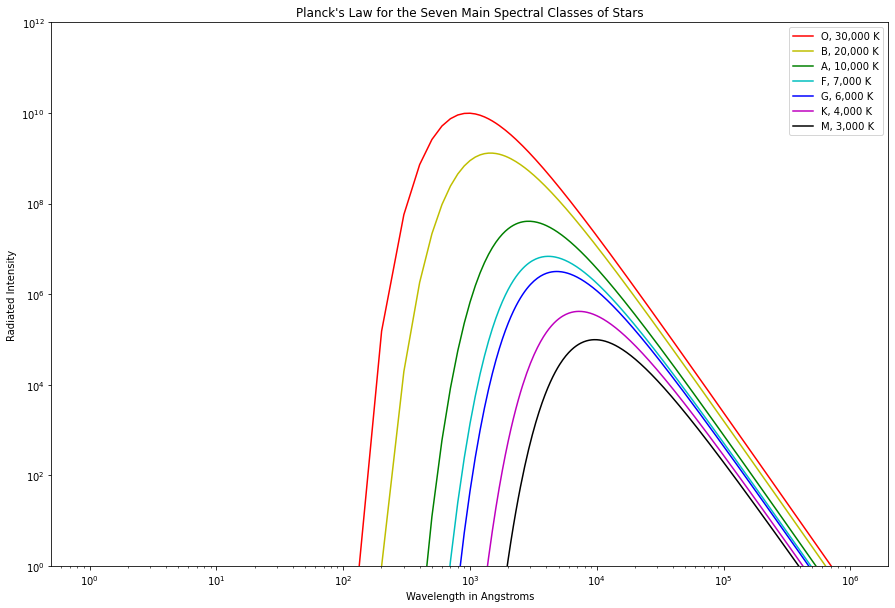

In [5]:
#create plot
plot = plt.figure(figsize=(15,10))

plt.loglog(lambdas, Bo, 'r-', label='O, 30,000 K')
plt.loglog(lambdas, Bb, 'y-', label='B, 20,000 K') 
plt.loglog(lambdas, Ba, 'g-', label='A, 10,000 K') 
plt.loglog(lambdas, Bf, 'c-', label='F, 7,000 K') 
plt.loglog(lambdas, Bg, 'b-', label='G, 6,000 K') 
plt.loglog(lambdas, Bk, 'm-', label='K, 4,000 K') 
plt.loglog(lambdas, Bm, 'k-', label='M, 3,000 K')

plt.ylim(1,10**12)

plt.xlabel('Wavelength in Angstroms')
plt.ylabel('Radiated Intensity')
plt.title("Planck's Law for the Seven Main Spectral Classes of Stars")
plt.legend()
plt.show()

In [6]:
#determine peak wavelengths
peakLamO = lambdas[np.where(Bo == np.amax(Bo))]
print("O star:, ", peakLamO)
peakLamB = lambdas[np.where(Bb == np.amax(Bb))]
print("B star:, ", peakLamB)
peakLamA = lambdas[np.where(Ba == np.amax(Ba))]
print("A star:, ", peakLamA)
peakLamF = lambdas[np.where(Bf == np.amax(Bf))]
print("F star:, ", peakLamF)
peakLamG = lambdas[np.where(Bg == np.amax(Bg))]
print("G star:, ", peakLamG)
peakLamK = lambdas[np.where(Bk == np.amax(Bk))]
print("K star:, ", peakLamK)
peakLamM = lambdas[np.where(Bm == np.amax(Bm))]
print("M star:, ", peakLamM)

O star:,  [1001.] Angstrom
B star:,  [1501.] Angstrom
A star:,  [2901.] Angstrom
F star:,  [4101.] Angstrom
G star:,  [4801.] Angstrom
K star:,  [7301.] Angstrom
M star:,  [9701.] Angstrom


We see that O, B, and A peak in UV. F, G, and K peak in Visible. M peaks in Infrared. Now, we will recreate this plot using an effective temperature of 5780 K to represent our own Sun. We will see that it peaks at approximately 5000 Angstroms, or roughly the yellow part of the visible light spectrum. 

/Users/samosels/opt/miniconda3/envs/ASTRON/lib/python3.8/site-packages/astropy/units/quantity.py:613: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


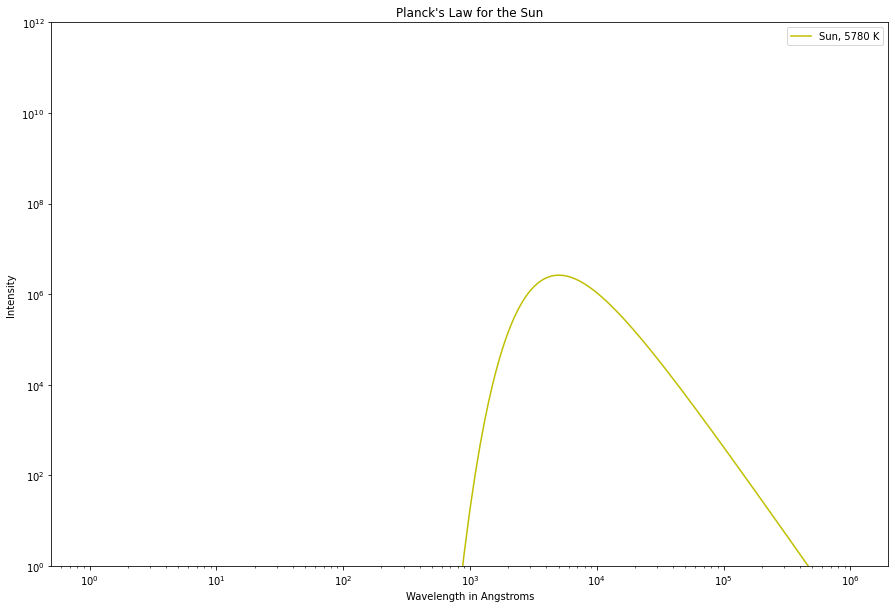

In [12]:
#Plot for Sun
Bsun = B(5780,lambdas)
plot = plt.figure(figsize=(15,10))

plt.loglog(lambdas, Bsun, 'y-', label='Sun, 5780 K')

plt.ylim(1,10**12)

plt.xlabel('Wavelength in Angstroms')
plt.ylabel('Intensity ')
plt.title("Planck's Law for the Sun")
plt.legend()
plt.show()